This code gives an introduction to unsupervised learning by solving a clustering problem using **K-Means Clustering** following [this tutorial](https://youtu.be/EItlUEPCIzM).

Replace 'XLABEL' and 'YLABEL' with the respective labels in your data set.

Import packages

In [70]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline


Import and explore the data set

In [71]:
df = pd.read_csv('cleanedfile.csv')
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


Scatter plot

Text(0, 0.5, 'offensive_language')

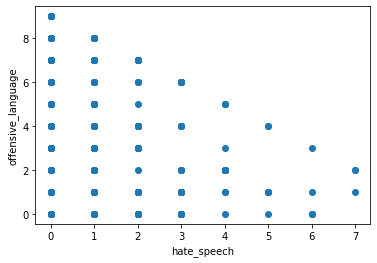

In [72]:
plt.scatter(df.hate_speech,df['offensive_language'])
plt.xlabel('hate_speech')
plt.ylabel('offensive_language')

Fit and predict three clusters for the data

In [73]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['hate_speech','offensive_language']])
y_predicted

array([0, 1, 1, ..., 1, 2, 0], dtype=int32)

In [74]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,cluster
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,2


In [75]:
km.cluster_centers_

array([[0.62183061, 0.37870887],
       [0.17547592, 2.77743561],
       [0.26431718, 5.95301028]])

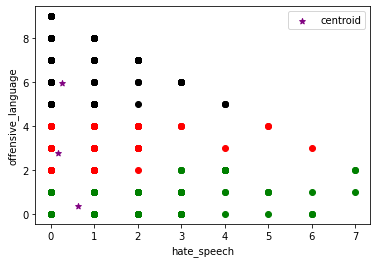

In [76]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.hate_speech,df1['offensive_language'],color='green')
plt.scatter(df2.hate_speech,df2['offensive_language'],color='red')
plt.scatter(df3.hate_speech,df3['offensive_language'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('hate_speech')
plt.ylabel('offensive_language')
plt.legend()

Fit the model using MinMaxScaler()

In [77]:
scaler = MinMaxScaler()

scaler.fit(df[['offensive_language']])
df['offensive_language'] = scaler.transform(df[['offensive_language']])

scaler.fit(df[['hate_speech']])
df['hate_speech'] = scaler.transform(df[['offensive_language']])

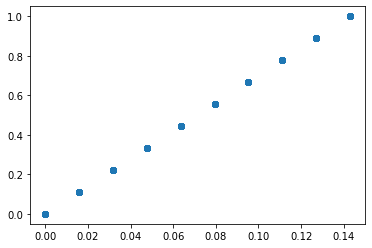

In [78]:
plt.scatter(df.hate_speech,df['offensive_language'])

In [79]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['hate_speech','offensive_language']])
y_predicted

array([1, 0, 0, ..., 0, 2, 1], dtype=int32)

In [80]:
df['cluster']=y_predicted
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,cluster
0,0,3,0.000000,0.000000,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,1
1,1,3,0.047619,0.333333,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,2,3,0.047619,0.333333,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,3,3,0.031746,0.222222,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0
4,4,6,0.095238,0.666667,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,2


In [81]:
km.cluster_centers_

array([[0.04407248, 0.30850733],
       [0.00591836, 0.04142854],
       [0.09449223, 0.66144559]])

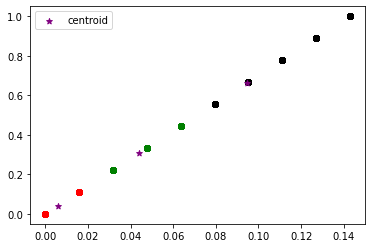

In [82]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.hate_speech,df1['offensive_language'],color='green')
plt.scatter(df2.hate_speech,df2['offensive_language'],color='red')
plt.scatter(df3.hate_speech,df3['offensive_language'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [83]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['hate_speech','offensive_language']])
    sse.append(km.inertia_)

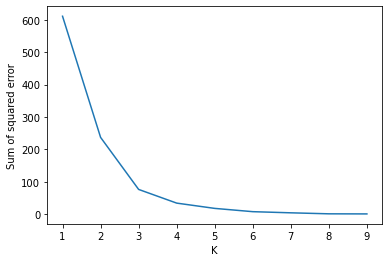

In [84]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)